In [0]:
import pandas as pd #импортируем библиотеку панда
from sklearn.ensemble import RandomForestClassifier#импортируем классификатор рандомный лес
from sklearn.tree import DecisionTreeClassifier#импортируем классификатор дерево решений
from sklearn.preprocessing import LabelEncoder# этот метод нам закодирует строки в числа, так как, любая модель в машинном обучении не работает со строками
from sklearn.metrics import accuracy_score#это оценка точности наших результатов 
le = LabelEncoder()#назначем переменной метод(функцию) кодирования

In [0]:
#load data
chess_data_origin = pd.read_csv('games.csv') 
chess_data = pd.read_csv('games.csv') 
# удаляю строки с пропущенными значениями
chess_data_origin = chess_data_origin.dropna(axis=0)
#посмотрим на наши данные
chess_data_origin

In [6]:
# этот цикл заменяет все строковые значения в нашем датасете
for column_name in chess_data.columns:
  if chess_data[column_name].dtype == object:
    chess_data[column_name] = le.fit_transform(chess_data[column_name])
  else:
    pass

#после такой кодировки наши данные стали выглядить следущим образом
chess_data

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,9068,False,1.504210e+12,1.504210e+12,13,2,2,110,1287,1500,11,1191,4524,248,1387,5
1,14512,True,1.504130e+12,1.504130e+12,16,3,0,298,16,1322,7748,1261,1987,71,750,4
2,14904,True,1.504130e+12,1.504130e+12,61,1,2,298,3823,1496,11,1500,16383,171,650,3
3,14350,True,1.504110e+12,1.504110e+12,61,1,2,187,2017,1439,134,1454,3770,241,992,3
4,3091,True,1.504030e+12,1.504030e+12,95,1,2,247,6056,1523,134,1469,15622,192,783,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20053,4563,True,1.499791e+12,1.499791e+12,24,3,2,21,1079,1691,4046,1220,6118,61,191,2
20054,9954,True,1.499698e+12,1.499699e+12,82,1,0,19,3921,1233,2855,1196,5421,37,960,2
20055,18757,True,1.499698e+12,1.499698e+12,35,1,2,19,3921,1219,7464,1286,3431,239,977,3
20056,11344,True,1.499696e+12,1.499697e+12,109,3,2,19,5235,1360,4046,1227,11217,78,806,4


In [7]:
#посмотрим какие колонки есть у наших данных
chess_data.columns

Index(['id', 'rated', 'created_at', 'last_move_at', 'turns', 'victory_status',
       'winner', 'increment_code', 'white_id', 'white_rating', 'black_id',
       'black_rating', 'moves', 'opening_eco', 'opening_name', 'opening_ply'],
      dtype='object')

In [27]:
#убедимся что предсказываемые исходы равномерно распределены по базе данных
print(" количество побед белых {0} \n количество побед черных {1}".format(
    chess_data.loc[chess_data.winner == 2].count().id,  chess_data.loc[chess_data.winner == 0].count().id))

 количество побед белых 10001 
 количество побед черных 9107


In [0]:
#выбираю что буду предсказывать - y, и на чем буду учиться X
y = chess_data.winner
features = ['rated', 'created_at', 'last_move_at', 'turns', 'victory_status', 'increment_code', 'white_id', 'white_rating', 'black_id',
       'black_rating', 'moves', 'opening_eco', 'opening_name', 'opening_ply']
X = chess_data[features]

In [0]:
from sklearn.model_selection import train_test_split#импортируем метод(фкнцию) для разделения наших данныхна тренировочные и проверочные

# делим данные на проверочные и тренировочные, для X и у
# split основан на генераторе рандомных чисел. ставя численной значение в
# аргумент random_state то он нам гарантирует, что мы получим тоже разделение каждые раз
train_X, val_X, train_y, val_y = train_test_split(X, y,random_state = 0)

DecisionTreeClassifier

In [0]:
model_DecisionTreeClassifier = DecisionTreeClassifier(max_leaf_nodes=90, random_state=0)#назначаем переменной модель
model_DecisionTreeClassifier.fit(train_X, train_y)#тренеруемся
preds_val = model_DecisionTreeClassifier.predict(val_X)#предсказываем
accuracy_score(val_y, preds_val)#оцениваем результат

0.654037886340977

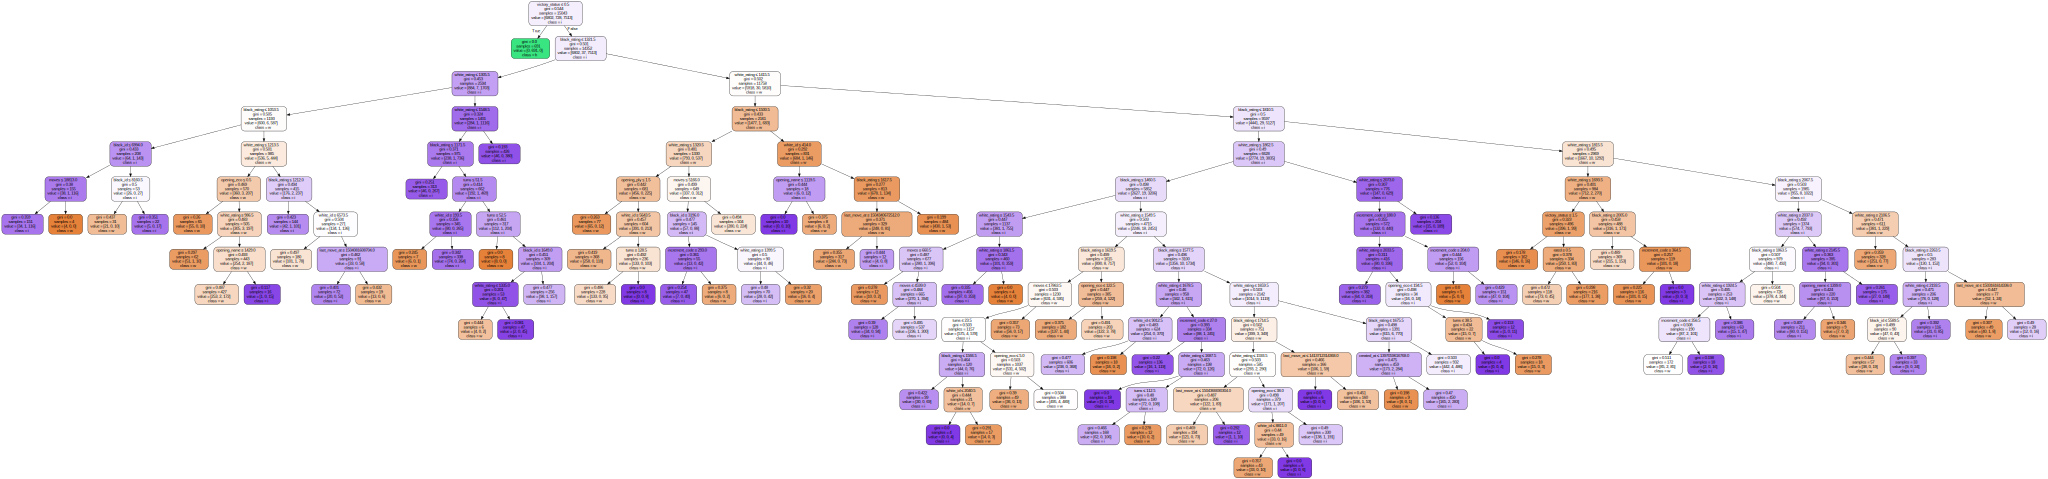

In [0]:
  import sklearn#построим дерево нашей модели
  import graphviz
  dot_data = sklearn.tree.export_graphviz(model_DecisionTreeClassifier, out_file = None, 
                                          feature_names = features, 
                                          class_names = 'white',
                                          filled=True, rounded = True,
                                          special_characters=True)
  graph = graphviz.Source(dot_data)
  graph.render('iris')
  graph

RandomForestClassifier

In [0]:
model_RandomForestClassifier = RandomForestClassifier(random_state=1,n_estimators=250, max_depth = 50 )#назначаем переменной модель
model_RandomForestClassifier.fit(train_X, train_y)#тренеруемся
preds_val = model_RandomForestClassifier.predict(val_X)#предсказываем
accuracy_score(val_y, preds_val)#оцениваем результат


0.6991026919242274

In [0]:
#эту функцию можно использовать для одновременной проверки точности разного количства листьев в treeclassificator 
def get_accurecy(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = DecisionTreeClassifier(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    accurecy = accuracy_score(val_y, preds_val)
    return(accurecy)

for i in [10, 50, 100, 150, 200]:
  print(get_accurecy(i, train_X, val_X, train_y, val_y))

0.6067796610169491
0.6494516450648056
0.651246261216351
0.651246261216351
0.6450648055832503
